In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

In [2]:
data=pd.read_csv("wine.csv")

data.drop(columns="Type",inplace=True)
data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# MANUAL PCA

Feature Scaling:Standardization for PCA

In [3]:
stdalgo=StandardScaler()
stddata=stdalgo.fit_transform(data)
stddf=pd.DataFrame(stddata)
cov=stddf.cov()
values,vectors=np.linalg.eig(cov)
values



array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.10396199, 0.35046627, 0.16972374,
       0.29051203, 0.22706428, 0.25232001])

In [4]:
pc0=stddf@vectors[:,0]
pc1=stddf@vectors[:,1]
pc2=stddf@vectors[:,2]
pc3=stddf@vectors[:,3]
pc4=stddf@vectors[:,4]
pc5=stddf@vectors[:,5]
pc6=stddf@vectors[:,6]
pc7=stddf@vectors[:,8]
pc8=stddf@vectors[:,10]
pc9=stddf@vectors[:,12]
pc10=stddf@vectors[:,11]
pc11=stddf@vectors[:,7]

# PCA USing SKLEARN

In [5]:
PCAalgo=PCA()
PCAalgo.fit_transform(stddf)
PCAalgo.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [6]:
np.cumsum(PCAalgo.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

# SCREE Plot 

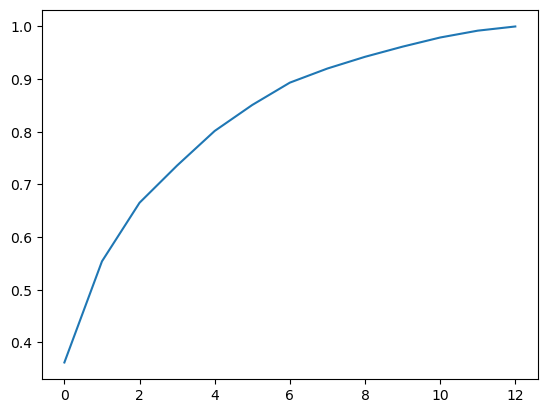

In [7]:
plt.plot(np.cumsum(PCAalgo.explained_variance_ratio_))

# Elbow Plot

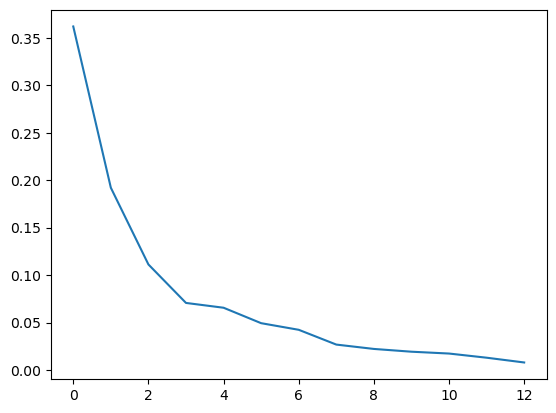

In [8]:
plt.plot(PCAalgo.explained_variance_ratio_)

In [9]:
# PCA for 3 components
PCAalgo=PCA(n_components=3)
pcadf=pd.DataFrame(PCAalgo.fit_transform(stddf))

PCAalgo.explained_variance_
np.cumsum(PCAalgo.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969])

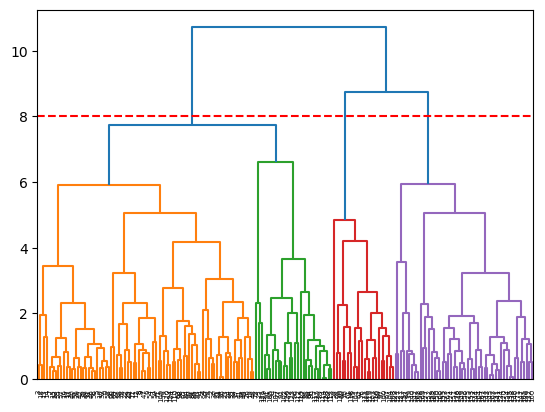

In [10]:
from scipy.cluster import hierarchy

lk = hierarchy.linkage(pcadf,method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 8 , c = 'red', linestyle = '--')

Insights: In the original data there are 3 group  which has been classified by including all the Available features.
Here we have seen that the same classification number ie 3 clusters are obtained just by using first 3 features with a 0.66 cumulative explained variance .

# KMEAN Clustering

In [12]:
from sklearn.cluster import KMeans
km = KMeans()
y = km.fit_predict(stddf)
km.cluster_centers_

array([[-0.76662764, -0.65488863, -1.38945669, -0.42728867, -0.79632973,
         0.07256582,  0.11879972, -0.56609256, -0.16837332, -0.82209488,
         0.62190773,  0.41739748, -0.78240864],
       [ 0.34165208,  0.60902107,  0.33440209,  0.67415668,  0.32708372,
        -0.93626213, -1.06588101,  0.19456433, -0.4199726 ,  1.58385937,
        -1.38573847, -1.45098187, -0.35632338],
       [ 1.11464751, -0.33880446, -0.00801444, -1.06002973,  0.39957425,
         1.02596175,  1.0831179 , -0.78369688,  0.77881284,  0.37166734,
         0.34439077,  0.87142532,  1.30624055],
       [-1.02603329, -0.52382982,  0.11215736,  0.61650196, -0.61658358,
        -0.56067561, -0.27154254,  0.83918881, -0.36881174, -0.94684806,
         0.59663666, -0.08882202, -0.7109486 ],
       [ 0.64092428, -0.4578374 ,  1.13049686,  0.0584144 ,  0.82744616,
         0.73815747,  0.78911131, -0.1972995 ,  0.18377715, -0.05381416,
         0.81014765,  0.63321875,  1.05658621],
       [-0.00503928,  1.123975

# ELBOW graph

In [20]:
import warnings
warnings.filterwarnings("ignore")
wcss = []

for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(stddf)
    wcss.append(km.inertia_)
    
wcss

[2314.0,
 1659.0079672511501,
 1277.928488844642,
 1175.3789993448736,
 1112.8167803281456,
 1052.1536002033986,
 996.385221177651,
 940.354542817198,
 903.7159505371553,
 851.5550977380384,
 823.9026872195622,
 798.7679529244838,
 773.8361360232324,
 754.0732032922333,
 719.6153950417836,
 696.9504479977006,
 686.8120350379737,
 669.9210823085277,
 638.469108139381]

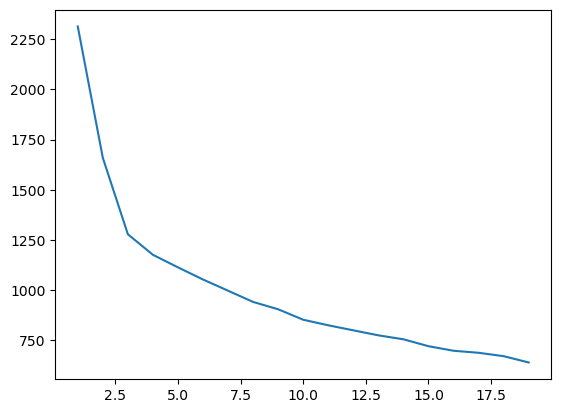

In [21]:
plt.plot(range(1,20),wcss)

Here also as per the analysis optimal clusteres =3